In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import plotly.express as px
from keras.preprocessing.image import ImageDataGenerator

In [19]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [2]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session =tf.compat.v1.InteractiveSession(config=config)

In [ ]:
!ls

afhq.zip  sample_data


In [ ]:
!unzip -q afhq.zip

In [ ]:
path = "/content/train"
class_names = sorted(os.listdir(path))
print(class_names)

['cat', 'dog', 'wild']


In [ ]:
num_skipped = 0
for folder_name in class_names:
    folder_path = os.path.join("train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print("Deleted %d images from training set" % num_skipped)

Deleted 0 images from training set


In [ ]:
num_skipped = 0
for folder_name in class_names:
    folder_path = os.path.join("val", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            os.remove(fpath)

print("Deleted %d images from validation set" % num_skipped)

Deleted 0 images from validation set


In [ ]:
class_dis = [len(os.listdir(path + "/" + name + "/")) for name in class_names]
path = "/content/val"
valclass_dis = [len(os.listdir(path + "/" + name + "/")) for name in class_names]

In [ ]:
fig = px.pie(names=class_names, values=class_dis, title="Class Distribution for training set", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [ ]:
fig = px.pie(names=class_names, values=valclass_dis, title="Class Distribution for validation set", hole=0.4)
fig.update_layout({'title':{'x':0.5}})
fig.show()

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                            horizontal_flip=True)

train_ds = datagen.flow_from_directory('afhq/train',
                                       class_mode='categorical',
                                       batch_size=32,
                                       target_size=(64, 64),
                                       shuffle=True)

valdatagen = ImageDataGenerator(rescale=1./255)

val_ds = valdatagen.flow_from_directory('afhq/val',
                                         class_mode='categorical',
                                         batch_size=32,
                                         target_size=(64, 64),
                                         shuffle=False)

Found 14630 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [ ]:
print(train_ds.classes)
print(train_ds.class_indices)

[0 0 0 ... 2 2 2]
{'cat': 0, 'dog': 1, 'wild': 2}


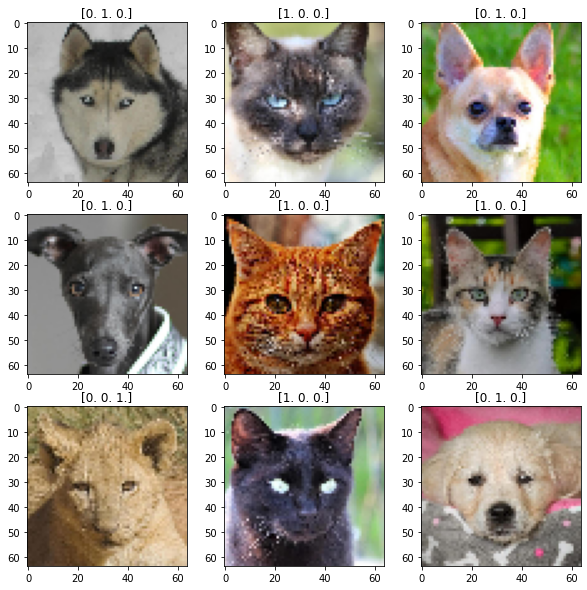

In [ ]:
import matplotlib.pyplot as plt
images, _ = next(train_ds)
plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(_[i])

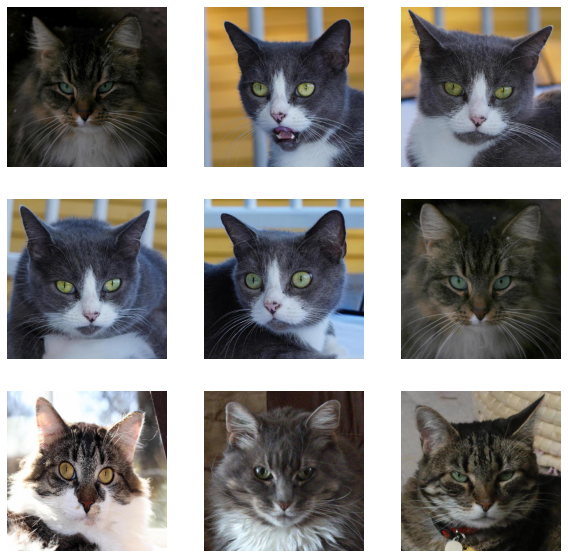

In [42]:
import matplotlib.image as mpimg
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('afhq/train/cat/'):
    if i > 9: 
        break
    images.append(mpimg.imread('afhq/train/cat/' + filename))
    i += 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

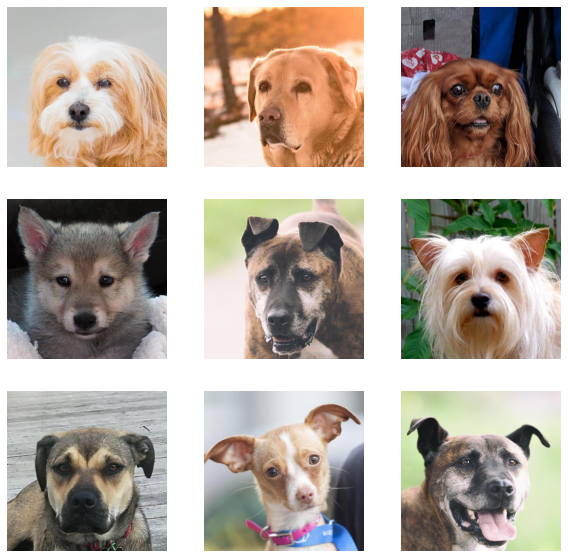

In [41]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('afhq/train/dog/'):
    if i > 9: 
        break
    images.append(mpimg.imread('afhq/train/dog/' + filename))
    i += 1

i = 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

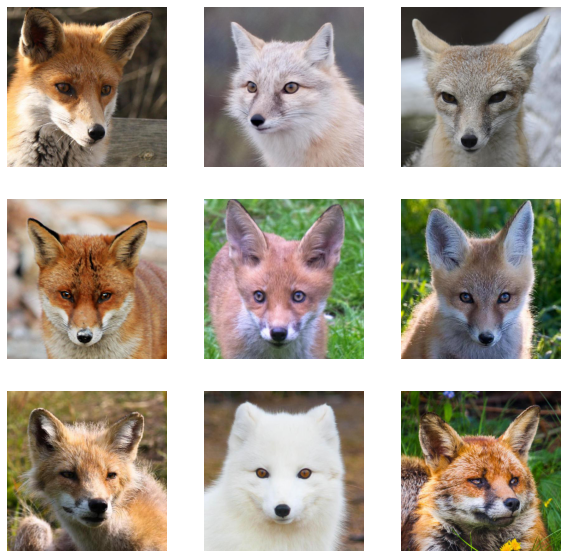

In [40]:
images=[]
plt.figure(figsize=(10, 10))
i = 1
for filename in os.listdir('afhq/train/wild/'):
    if i > 9: 
        break
    images.append(mpimg.imread('afhq/train/wild/' + filename))
    i += 1

i = 1

for i, image in enumerate(images):
    if i > 9: 
        break
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis("off")
    i += 1

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), 1, activation='relu', kernel_initializer='he_uniform', padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

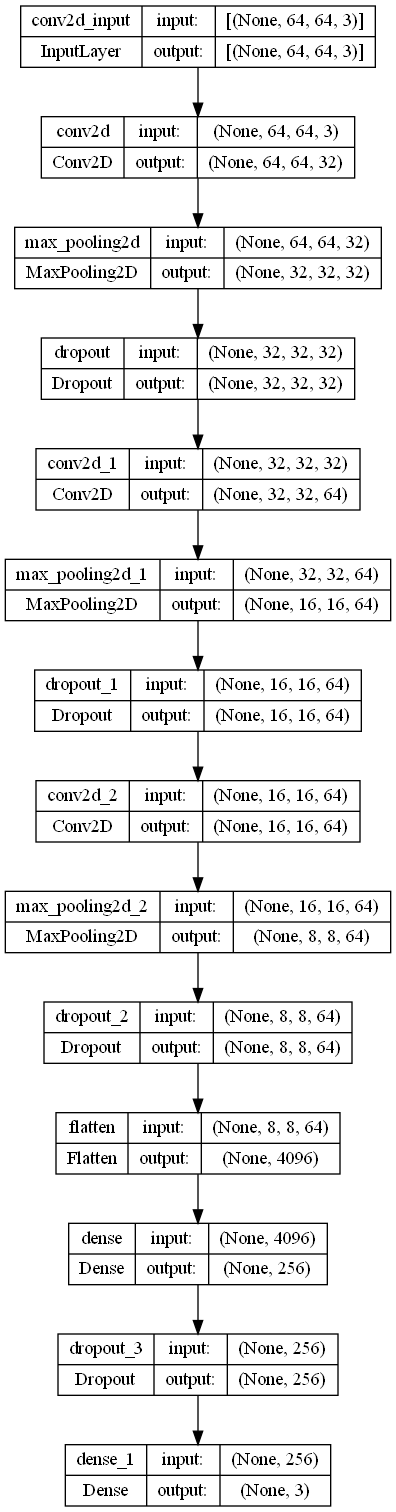

In [4]:
model.build((None, 64,64,3))
model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
print(len(train_ds))
print(len(val_ds))

458
47


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 25

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
]

history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    epochs=epochs,
    validation_data=val_ds,
    validation_steps=len(val_ds),
)

Epoch 1/25
458/458 [==============================] - 195s 424ms/step - loss: 1.0544 - accuracy: 0.5635 - val_loss: 0.6453 - val_accuracy: 0.7233
Epoch 2/25
458/458 [==============================] - 193s 421ms/step - loss: 0.5351 - accuracy: 0.7824 - val_loss: 0.4194 - val_accuracy: 0.8520
Epoch 3/25
458/458 [==============================] - 192s 419ms/step - loss: 0.3810 - accuracy: 0.8536 - val_loss: 0.2727 - val_accuracy: 0.9120
Epoch 4/25
458/458 [==============================] - 194s 424ms/step - loss: 0.3140 - accuracy: 0.8838 - val_loss: 0.2455 - val_accuracy: 0.9260
Epoch 5/25
458/458 [==============================] - 192s 418ms/step - loss: 0.2487 - accuracy: 0.9074 - val_loss: 0.1666 - val_accuracy: 0.9407
Epoch 6/25
458/458 [==============================] - 191s 418ms/step - loss: 0.2184 - accuracy: 0.9185 - val_loss: 0.1920 - val_accuracy: 0.9280
Epoch 7/25
458/458 [==============================] - 194s 424ms/step - loss: 0.1917 - accuracy: 0.9286 - val_loss: 0.1314 -

In [ ]:
model.save('modelp2_trained.h5')

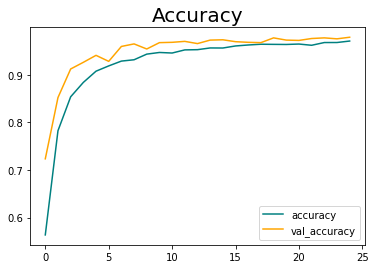

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy', fontsize=20)
plt.legend(loc="lower right")

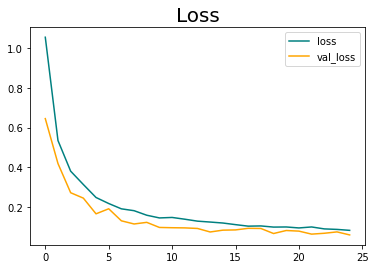

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

In [5]:
from keras.models import load_model
model = load_model("modelp2_trained.h5")

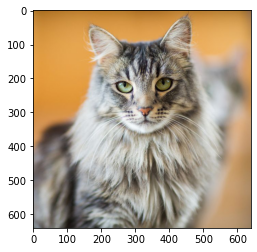

1/1 [==============================] - 0s 338ms/step
cat: 0.78889865
dog: 0.024982836
wild: 0.18611856

PREDICTED
cat: 0.78889865


In [6]:
import cv2
import numpy as np
import matplotlib.image as mpimg

CATEGORIES = ["cat", "dog", "wild"]
def predict(name):
    #img = cv2.imread(name)
    img = mpimg.imread(name)
    resize = tf.image.resize(img, (64,64))
    #plt.imshow(resize.numpy().astype(int))
    plt.imshow(img)
    plt.show()
    prediction = model.predict(np.expand_dims(resize/255, 0))
    res = {CATEGORIES[i]: prediction[0][i] for i in range(len(CATEGORIES))}
    for item in res.items():
        print(item[0] + ": " + str(item[1]))
    print()
    print("PREDICTED")
    print(list(res.keys())[list(res.values()).index(max(res.values()))] + ": "+ str(max(res.values())))

predict("1.jpg")

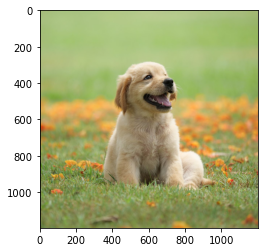

1/1 [==============================] - 0s 63ms/step
cat: 0.006952934
dog: 0.0018522679
wild: 0.9911947

PREDICTED
wild: 0.9911947


In [7]:
predict("2.jpg")

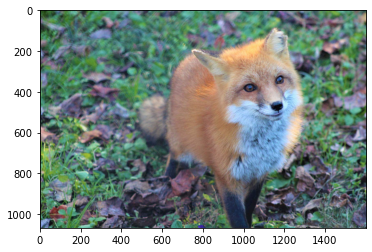

1/1 [==============================] - 0s 48ms/step
cat: 0.0079547
dog: 0.0082550105
wild: 0.98379034

PREDICTED
wild: 0.98379034


In [8]:
predict("3.jpg")

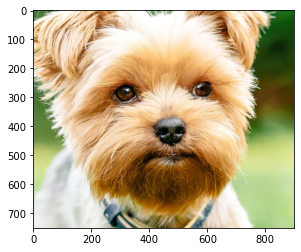

1/1 [==============================] - 0s 62ms/step
cat: 0.0006810852
dog: 0.99868363
wild: 0.00063526846

PREDICTED
dog: 0.99868363


In [9]:
predict("4.jpg")

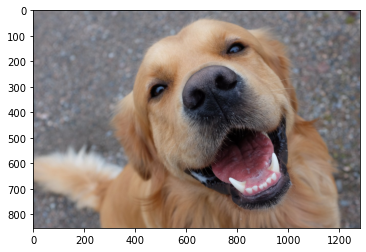

1/1 [==============================] - 0s 46ms/step
cat: 0.00018273082
dog: 0.99963844
wild: 0.00017887788

PREDICTED
dog: 0.99963844


In [10]:
predict("5.jpg")

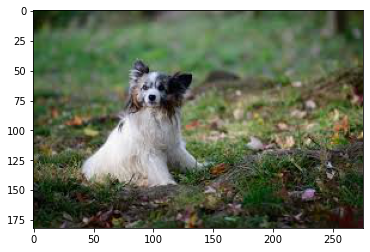

1/1 [==============================] - 0s 46ms/step
cat: 0.59646964
dog: 0.22553702
wild: 0.17799336

PREDICTED
cat: 0.59646964


In [11]:
predict("6.jpg")

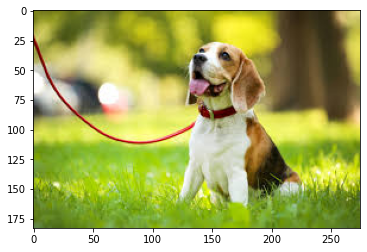

1/1 [==============================] - 0s 63ms/step
cat: 0.097665094
dog: 0.55404747
wild: 0.34828737

PREDICTED
dog: 0.55404747


In [12]:
predict("8.jpeg")